# Bike Renting at San Francisco Bay
## by Petra Schneckenburger

## Investigation Overview

> Bay Wheels, formaly FordGoBike, is a regional public bicycle sharing system in the San Francisco Bay Area, California. Users can subscribe either for a monthly or yearly membership or register to pay for single trips.

> Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. Since in many countries the interest for bike renting is growing, it is worth to examin the usage data of this service further.

## Dataset Overview

> The owning company Lyft provides monthly usage data on its homepage, actually up to July 2019.
> For the data shown here, a timespan from January 2018 up to July 2019 was examined.  The data gave informations of stations and their gps coordinates, trip durations and about the users, as gender and age and the kind of contract.  After removing entries with missing or incorrect data, the resulting set consists of informations of about 3.06 Mio bike trips.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
data = pd.read_csv('baywheels_data_final.csv')
data.head()

FileNotFoundError: [Errno 2] File b'baywheels_data_final.csv' does not exist: b'baywheels_data_final.csv'

In [3]:
# setting up weekdays as orderd category
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
data.weekday = pd.Categorical(data.weekday, categories = weekdays)

## Development of bike usage over the observed time

- Observing the amounts of taken trips for each month shows that overall the bike usage has grown.
- We can clearly see dips during the winter months, when the weather is colder and weter.
- In April 2018, Ford GoBike introduced electric bikes, what resulted in an increase of trips.
- In April 2019 however, the electric bikes were withdrawn due to security issues, resulting in a sudden jump down of trip counts.


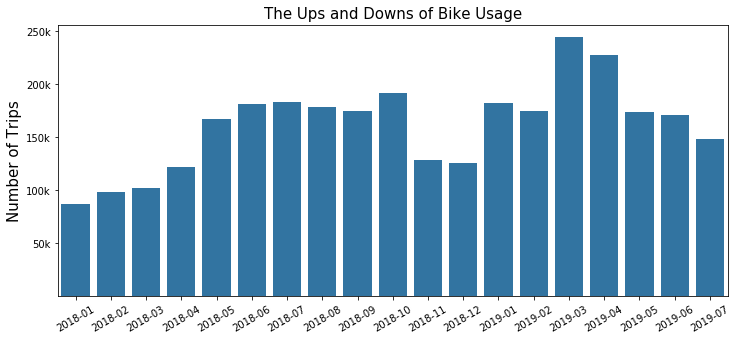

In [104]:
# Overall usage in observed time span
# usage over time
plt.figure(figsize=[12,5]);
base_color = sns.color_palette()[0]
sns.countplot(data = data, x = 'year_month', color = base_color);
plt.xticks(rotation = 30);
plt.xlabel('');
plt.ylabel(ylabel='Number of Trips', size=15);
plt.yticks([50000, 100000, 150000, 200000,250000], ['50k', '100k', '150k', '200k', '250k']);
plt.title(label='The Ups and Downs of Bike Usage', size=15);

## Bike usage shows different patterns on working days and weekends

- Resolving trip usage on a daily and hourly level on regarding starting hours shows that that bike usage follows distinct patterns. 
- On weekdays, most trips start around the rush hours, i.e. around 8am and 5pm. 
- On weekends however, we see a complete other pattern, overall there are much less trips on these days, and there is no sharp peak, but a broad distribution of trip start counts from late morning to the afternoon. 
- From this we can conclude that on weekdays the bikes mostly are used for the way to and from work while on weekends they more are used for trips on leisure time.

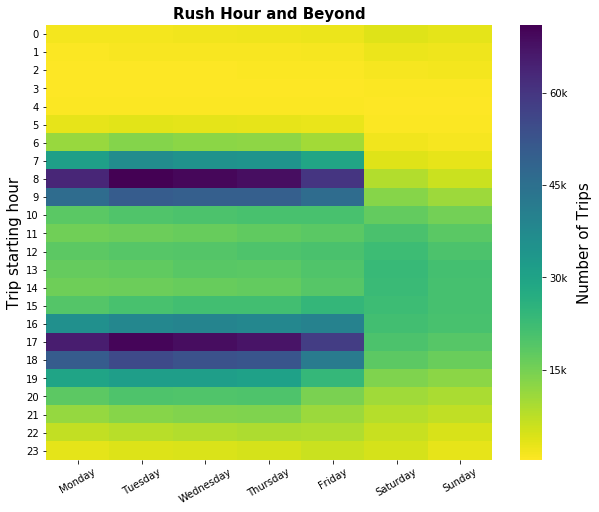

In [7]:
# time pattern in usage
plt.figure(figsize=[10,8]);

wd_counts = data.groupby(['weekday', 'hour']).size()
wd_counts = wd_counts.reset_index(name = 'count')
wd_counts = wd_counts.pivot(index = 'hour', columns = 'weekday', values = 'count')
ax = sns.heatmap(wd_counts, cmap='viridis_r');
#plt.title('Trip patterns of weekday and daytime');
plt.title(label='Rush Hour and Beyond', size=15, weight='bold');

plt.xlabel('');
plt.xticks(rotation=30)
plt.ylabel(ylabel='Trip starting hour', size=15)
plt.yticks(rotation=0);

cbar = ax.collections[0].colorbar
cbar.set_label('Number of Trips', size=15, labelpad=10)
cbar.set_ticks([15000, 30000, 45000, 60000])
cbar.set_ticklabels(['15k', '30k', '45k', '60k'])


## Subscriber and customer show different patterns on daily usage

> Subscribers register for a monthly or yearly fee and have unlimited trips up to 45 min included, whereas Customers pay for every trip.
> Since there are much more subscribers than customers, not the mere trip counts but the proportion of trips to the total trip count of each group was calculated for this plot.

-  we can  clearly see that the group of subscribers is contributing most to the observed traffic during rush hours on weekdays.
- Customers also are very active at these times, but  they also show much activity on weekends.
- so we can conclude that it is the group of subscribers that use the bikes mostly for work, while customers use them both, for work and for leisure times.

In [5]:
# split datframe in customer_data and subscriber_data
customer_data = data[data.user_type == 'Customer']
subscriber_data = data[data.user_type == 'Subscriber']

#calculating percentage of total  trips for  each group and pivoting data
customer_props = customer_data.groupby(['hour', 'weekday']).size()/customer_data.shape[0]*100
customer_props = customer_props.reset_index(name = 'count')
customer_props = customer_props.pivot(index = 'hour', columns = 'weekday', values = 'count')

subscriber_props = subscriber_data.groupby(['hour', 'weekday']).size()/subscriber_data.shape[0]*100
subscriber_props = subscriber_props.reset_index(name = 'count')
subscriber_props = subscriber_props.pivot(index = 'hour', columns = 'weekday', values = 'count')



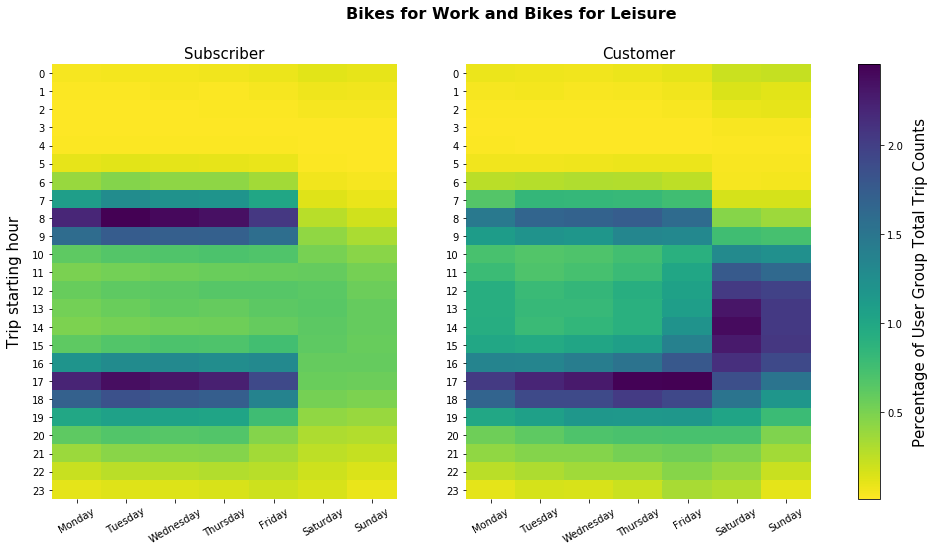

In [8]:
# setting up the plot

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True,  figsize=[17,8])
#plt.suptitle(t='Daily Usage pattern of Customer and Subscriber Group ', size=15, weight='bold')
plt.suptitle(t= 'Bikes for Work and Bikes for Leisure', size=16, weight='bold')

# left plot
im = sns.heatmap(subscriber_props, ax=ax1,  cmap='viridis_r', cbar = False)
ax1.set_ylabel(ylabel="Trip starting hour", size=15, labelpad=10)
ax1.set_xlabel('')
ax1.set_title(label='Subscriber', size=15)
ax1.tick_params(axis='x', rotation=30)
ax1.tick_params(axis='y', rotation=0)


# right plot
sns.heatmap(customer_props, ax=ax2, cmap='viridis_r', cbar = False)
ax2.set_ylabel('')    
ax2.set_xlabel('')
ax2.set_title(label='Customer', size=15)
ax2.tick_params(axis='x', rotation=30 )
ax2.tick_params(axis='y', rotation=0)

mappable = im.get_children()[0]
cbar = plt.colorbar(mappable, ax = [ax1,ax2] )
cbar.set_label(label='Percentage of User Group Total Trip Counts',size=15, labelpad=10)



## Who is using the bawheels service?

> Finally let's have a look on the users themselves.

- As can be seen, there are much more subscribers than customers.
- The users up to the age of 39 make the major part in both customers and subscribers, customers tending to be slightly younger than members of the subscriber group.
- Interestingly, there is a gender gap in bike usage, the main proportion in the customer as well as in the subscriber group are male.


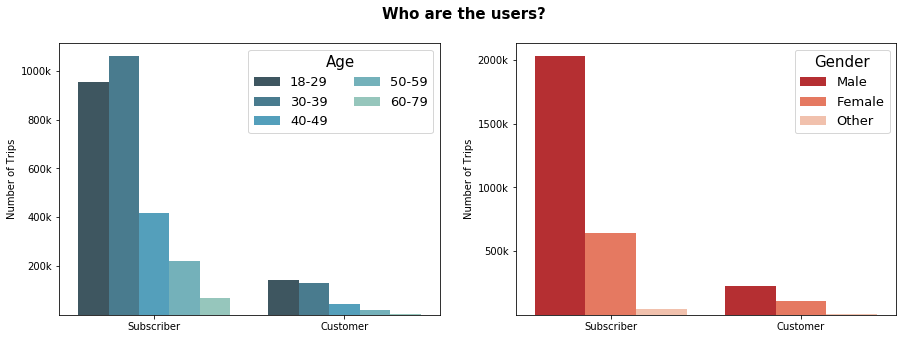

In [115]:

plt.figure(figsize =[15, 5]);
plt.suptitle(t='Who are the users?', size=15, weight='bold');

# left plot
plt.subplot(121);
age_order = ['18-29', '30-39', '40-49', '50-59', '60-79']
ax1 = sns.countplot(data = data, x = 'user_type', hue = 'age_group', hue_order=age_order, palette='GnBu_d');
ax1.legend(title = 'Age', title_fontsize=15, ncol=2, fontsize=13);
plt.xlabel('');
plt.ylabel('Number of Trips');
plt.yticks([200000, 400000, 600000, 800000, 1000000], ['200k', '400k', '600k', '800k', '1000k'])

# right plot
plt.subplot(122);
ax2 = sns.countplot(data = data, x = 'user_type', hue = 'member_gender', palette = 'Reds_r');
ax2.legend(title = 'Gender', title_fontsize=15, fontsize=13);
plt.xlabel('');
plt.ylabel('Number of Trips');
plt.yticks([500000, 1000000, 1500000, 2000000], ['500k', '1000k', '1500k', '2000k']);

# tried to set same y-axis scale for both plots but it looked awful
